# <center>Майнор "Интеллектуальный анализ данных"</center>

# <center>Курс "Введение в анализ данных"</center>

# <center>Лабораторная работа №3. Supervised Learning</center>

## Данные

В рамках данной лабораторной работы вам предлагается проанализировать набор данных о студентах двух школ в Португалии.  
В файле `students_data.csv` представлена информация о студентах, посещающих два курса - математику (`Math`) и поргутальский язык (`Por`). Некоторые студенты представлены в обоих курсах, некоторые - только в одном. Для каждого студента известны три оценки по курсу: оценка за первое полугодие (`G1`), оценка за второе полугодие (`G2`) и итоговая оценка за год (`G3`).

In [173]:
import pandas as pd
import numpy as np

In [174]:
pd.set_option('display.max_columns', 40)

pd.set_option('display.max_colwidth', None)

In [175]:
df = pd.read_csv("students_data.csv")

df.shape

(1044, 36)

In [176]:
df.head(15)

,ID,Subject,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,cheating,G1,G2,G3
0,100097,Por,GP,F,16,U,GT3,A,3,4,services,other,course,father,1,1,0,no,no,no,no,yes,yes,yes,no,3.0,2,1,1.0,4.0,5,12,NaN,15,13,14
1,101021,Por,GP,F,17,U,GT3,T,3,2,other,other,course,mother,1,2,0,no,no,no,yes,no,yes,yes,no,5.0,3,4,1.0,3.0,3,2,NaN,17,18,17
2,102965,Por,GP,M,16,U,LE3,T,1,2,health,services,course,mother,2,1,2,no,no,no,no,no,yes,yes,no,4.0,4,5,3.0,5.0,5,0,yes,9,8,10
3,102989,Por,MS,M,17,U,GT3,T,2,3,other,services,home,father,2,2,0,no,no,no,yes,yes,yes,yes,no,4.0,4,3,1.0,1.0,3,4,no,14,15,16
4,103131,Por,GP,F,16,U,GT3,T,1,1,at_home,other,home,mother,2,1,0,no,yes,no,no,yes,yes,no,NaN,4.0,3,2,1.0,4.0,5,2,yes,12,13,13
5,103144,Por,GP,M,18,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,yes,yes,yes,yes,yes,3.0,3,4,4.0,5.0,4,2,NaN,11,11,12
6,105257,Por,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,0,no,no,no,yes,yes,yes,no,no,1.0,1,1,1.0,1.0,5,6,NaN,11,12,9
7,107639,Por,MS,F,15,R,GT3,T,4,4,teacher,other,course,mother,2,1,0,no,no,no,no,yes,yes,yes,yes,1.0,5,1,3.0,5.0,5,0,NaN,13,14,14
8,107914,Math,GP,F,15,U,LE3,T,3,2,services,other,reputation,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4.0,4,4,1.0,1.0,5,10,no,7,6,6
9,108089,Por,MS,M,16,R,GT3,T,3,4,other,health,other,mother,3,2,0,no,no,no,no,no,yes,no,no,3.0,4,5,1.0,2.0,5,4,NaN,9,10,11


### Признаки

Данные представлены признаками различных типов: числовыми, категориальными, упорядоченными категориальными.

**Описание признаков:**

In [177]:
pd.read_csv('students_data_features.csv',
            delimiter=';',
            encoding='windows-1251')

,Признак,Описание
0,ID,Уникальный номер наблюдения
1,Subject,"Предмет: 'Math' - математика, 'Por' - португальский язык"
2,school,"Школа: 'GP' - Gabriel Pereira, 'MS' - Mousinho da Silveira"
3,sex,"Пол студента: 'F' - женский, 'M' - мужской"
4,age,Возраст студента
5,address,"Место проживания студента: 'U' - в городе, 'R' - за городом"
6,famsize,"Число членов семьи: 'LE3' - если <= 3, 'GT3' - если > 3"
7,Pstatus,"Отношения родителей: 'T' - живут вместе, 'A' - живут раздельно"
8,Medu,"Образование матери: 0 - без образования, 1 - начальная школа, 2 – от 5 до 9 классов, 3 – среднее образование, 4 – высшее образование"
9,Fedu,"Образование отца: 0 - без образования, 1 - начальная школа, 2 – от 5 до 9 классов, 3 – среднее образование, 4 – высшее образование"


## Часть 1. Предобработка данных

* Разделите данные на две части - данные для моделирования (80%) и отложенную выборку (20%). Убедитесь, что распределение целевой переменной (`G3`) одинаково в обоих частях.  
  __NB__: Отложенную выборку нужно использовать только для финальной оценки качества модели. Обучение и кросс-валидацию следует проводить на данных для моделирования.  
* Выполните необходимые преобразования данных: исправление ошибок, удаление выбросов и пропусков, приведение признаков к числовому виду.  
* Оцените значимость признаков для определения итоговой оценки за курс. Исключите из выборки незначимые на ваш взгляд признаки, обоснуйте свое решение. 
* (Опционально) Feature engineering: создайте новые признаки (значимые) на основе уже имеющихся.
  
**Tip:** Используйте свои наработки из Лабораторной работы №1.

**Преобразования**

In [178]:
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 36 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          1044 non-null   int64  
 1   Subject     1044 non-null   object 
 2   school      1044 non-null   object 
 3   sex         1044 non-null   object 
 4   age         1044 non-null   int64  
 5   address     1044 non-null   object 
 6   famsize     1044 non-null   object 
 7   Pstatus     1044 non-null   object 
 8   Medu        1044 non-null   object 
 9   Fedu        1044 non-null   object 
 10  Mjob        1044 non-null   object 
 11  Fjob        1044 non-null   object 
 12  reason      1044 non-null   object 
 13  guardian    1044 non-null   object 
 14  traveltime  1044 non-null   int64  
 15  studytime   1044 non-null   int64  
 16  failures    1044 non-null   int64  
 17  schoolsup   1044 non-null   object 
 18  famsup      1044 non-null   object 
 19  paid        1044 non-null  

In [180]:
for feature in df.columns:
  print(feature, df[feature].unique())

ID [100097 101021 102965 ... 998425 999143 999194]
Subject ['Por' 'Math']
school ['GP' 'MS']
sex ['F' 'M' 'm']
age [16 17 18 15 19 21 20 22]
address ['U' 'R']
famsize ['GT3' 'LE3']
Pstatus ['A' 'T' 't']
Medu ['3' '1' '2' '4' '0' 'o']
Fedu ['4' '2' '3' '1' 'o' '0']
Mjob ['services' 'other' 'health' 'at_home' 'teacher' 'at-home']
Fjob ['other' 'services' 'health' 'at-home' 'teacher' 'at_home']
reason ['course' 'home' 'reputation' 'other']
guardian ['father' 'mother' 'other' 'futher']
traveltime [1 2 3 4]
studytime [1 2 4 3]
failures [0 2 1 3]
schoolsup ['no' 'yes']
famsup ['no' 'yes']
paid ['no' 'yes']
activities ['no' 'yes']
nursery ['yes' 'no']
higher ['yes' 'no']
internet ['yes' 'no']
romantic ['no' nan 'yes']
famrel [ 3.  5.  4.  1.  2. nan]
freetime [2 3 4 1 5]
goout [1 4 5 3 2]
Dalc [ 1.  3.  4.  2.  5. nan]
Walc [ 4.  3.  5.  1.  2. nan]
health [5 3 4 2 1]
absences [12  2  0  4  6 10  7 20 14 11 24  8 16 21  1 18  5 22  9  3 15 26 25 54
 56 40 19 13 38 30 17 28 32 23 75]
cheating 

исправляем опечатки

In [181]:
for index in df.index:
  if df.loc[index,'Medu'] == 'o':
    df.loc[index,'Medu'] = '0'
  if df.loc[index,'Fedu'] == 'o':
    df.loc[index,'Fedu'] = '0'
  if df.loc[index,'sex'] == 'm':
    df.loc[index,'sex'] = 'M'
  if df.loc[index,'guardian'] == 'futher':
    df.loc[index,'guardian'] = 'father'
  if df.loc[index,'Mjob'] == 'at-home':
    df.loc[index,'Mjob'] = "at_home"
  if df.loc[index,'Fjob'] == 'at-home':
    df.loc[index,'Fjob'] = "at_home"
  if df.loc[index,'Pstatus'] == 't':
    df.loc[index,'Pstatus'] = "T"

In [182]:
df['Fedu']=df.Fedu.astype('int64')
df['Medu']=df.Medu.astype('int64')

In [183]:
df=df.dropna(subset=['romantic', 'famrel', 'Dalc', 'Walc'])

In [184]:
df['Dalc']=df.Dalc.astype('int64')
df['Walc']=df.Walc.astype('int64')
df['famrel']=df.famrel.astype('int64')

По признакам **romantic**, **famrel**, **Dalc**, **Walc** пропущенных значений совсем не много, можно просто удалить соответствующие наблюдения

иная ситуация с **cheating** здесь наблюдений с пропущенными значениями большинство, удалять ни в коем случае нельзя.
Моя мысль следующая:
**"yes"** - это тот, кто однозначно был пойман за списыванием. 
**"no"** - это тот, чья благонадежность не подлежит сомнениям
**NаN** - это тот, о ком нет достоверной информации о списывании, но и быть увереным, что данный человек никогда не списывал нельзя. По этому можно выделить NaN в этом признаке как отдельное значение признака и использовать при дальнейшем анализе.

добавляем значение признака "No info", т.к. не хотим удалять признак и с NaN работать не всегда удобно

In [185]:
for index in df.index:
  if pd.isna(df.loc[index,'cheating']):
    df.loc[index,'cheating'] = 'No info'

**Не значимые признаки**

Может показаться, что в данных довольно много признаков которые, казалось бы, не могут никак влиять на итоговую оценку. Но я считаю, что большинство признаков важны так как могут иметь косвенное влияние

сомнения могут вызывать признаки **romantic, famrel, health, address, traveltime**

но

romantic, famrel, health влияют на эмоциональное состояние студента

address, traveltime влияют на признак abscences, который в свою очередь имеет уже непосредственное влияние на признак absences, который в свою очередь уже имеет довольно значимое слияние на оценку

я принял решение исключить признаки famsize, guardian, Pstatus несмотря на то, что все эти признаки связаны с семьей, особой корреляции между ними и эмоциональным состоянием или временем, выделяемым на учебу я не нашел

In [186]:
df=df.drop(columns=['famsize', 'guardian','Pstatus','ID',])
df.columns

Index(['Subject', 'school', 'sex', 'age', 'address', 'Medu', 'Fedu', 'Mjob',
       'Fjob', 'reason', 'traveltime', 'studytime', 'failures', 'schoolsup',
       'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet',
       'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health',
       'absences', 'cheating', 'G1', 'G2', 'G3'],
      dtype='object')

теперь займемся фичами, которые представлены, как обьекты. yes\no фичи просто заменим на 1\0

другие будем преобразовывать OneHot энкодером

In [187]:
bin_objects_lst=[]
for col in df.columns:
  if df[col].dtype == 'object' and len(df[col].unique()) == 2 and df[col].unique()[0] in ['yes','no']:
    bin_objects_lst.append(col)

In [188]:
for feature in bin_objects_lst:
  for index in df.index:
    if df.loc[index, feature] == "no":
      df.loc[index, feature] = 0
    else:
      df.loc[index, feature] = 1

In [189]:
for feature in bin_objects_lst:
  df[feature]=df[feature].astype('int64')

In [190]:
obj_lst=[]
for col in df.columns:
  if df[col].dtype == 'object':
    obj_lst.append(col)
obj_lst

['Subject', 'school', 'sex', 'address', 'Mjob', 'Fjob', 'reason', 'cheating']

In [191]:
from sklearn.preprocessing import OneHotEncoder

In [192]:
columnsToEncode = obj_lst
myEncoder = OneHotEncoder()
arr = myEncoder.fit_transform(df[columnsToEncode]).toarray()
#myEncoder.get_feature_names()
df_encoded = pd.DataFrame(arr, columns = myEncoder.get_feature_names())
df=df.drop(columns=columnsToEncode)

In [193]:
df_encoded.shape

(1004, 25)

In [194]:
df.shape

(1004, 24)

In [195]:
df.reindex()

,age,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,16,3,4,1,1,0,0,0,0,0,1,1,1,0,3,2,1,1,4,5,12,15,13,14
1,17,3,2,1,2,0,0,0,0,1,0,1,1,0,5,3,4,1,3,3,2,17,18,17
2,16,1,2,2,1,2,0,0,0,0,0,1,1,0,4,4,5,3,5,5,0,9,8,10
3,17,2,3,2,2,0,0,0,0,1,1,1,1,0,4,4,3,1,1,3,4,14,15,16
5,18,3,1,2,1,0,0,0,0,1,1,1,1,1,3,3,4,4,5,4,2,11,11,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1037,15,3,3,1,2,0,0,1,0,0,1,1,1,1,4,5,4,1,1,1,4,13,12,12
1038,16,2,2,1,2,0,0,0,0,0,1,1,1,0,4,4,4,1,1,3,0,13,12,13
1039,15,3,3,2,3,2,0,1,1,1,1,1,1,1,4,2,1,2,3,3,8,10,10,10
1040,15,2,1,1,2,0,0,0,0,1,1,1,1,1,5,4,2,1,1,5,4,10,9,10


In [196]:
df = pd.concat([df.reset_index(), df_encoded], axis=1)

In [197]:
#df.info()

In [198]:
df.corr()['G3']

index            0.007584
age             -0.117976
Medu             0.207814
Fedu             0.164776
traveltime      -0.112519
studytime        0.158775
failures        -0.382542
schoolsup       -0.069563
famsup           0.016054
paid            -0.051571
activities       0.032317
nursery          0.041225
higher           0.231535
internet         0.114937
romantic        -0.102574
famrel           0.052474
freetime        -0.057242
goout           -0.092770
Dalc            -0.125858
Walc            -0.110614
health          -0.070054
absences        -0.043690
G1               0.807610
G2               0.910560
G3               1.000000
x0_Math         -0.194425
x0_Por           0.194425
x1_GP            0.116344
x1_MS           -0.116344
x2_F             0.029187
x2_M            -0.029187
x3_R            -0.112852
x3_U             0.112852
x4_at_home      -0.111212
x4_health        0.104835
x4_other        -0.072740
x4_services      0.047449
x4_teacher       0.093376
x5_at_home  

судя по выдержке из таблицы корреляций, у нас все еще довольно много незначащих признаков, но я хочу попробовать не удалять их, чтобы посмотреть как это скажется на результатах

# **Разделение на две выборки**

In [199]:
df.shape

(1004, 50)

In [200]:
df_train, df_test = train_test_split(df, test_size=0.2)
df_train.shape

(803, 50)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056

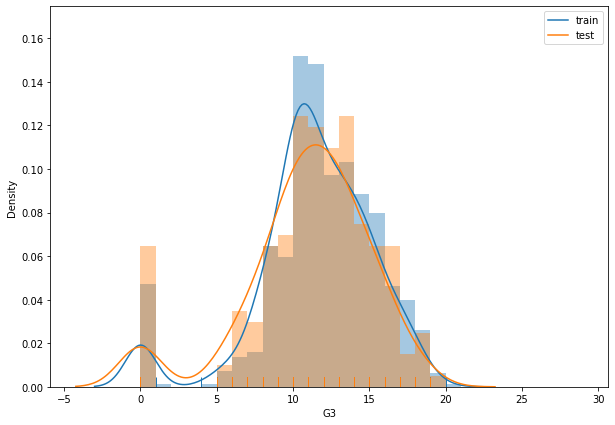

In [201]:
rcParams['figure.figsize'] = [10, 7]
sns.distplot(df_train.G3, bins=range(30), kde=True, rug=True)
sns.distplot(df_test.G3, bins=range(30), kde=True, rug=True)
plt.legend(['train','test'])
plt.show()

различия незначительны

## Часть 2. Регрессия

* Решите задачу регрессии: постройте модель, предсказывающую итоговую оценку, которую получит студент по предмету (`G3`). При решении задачи **нельзя** использовать признак `G2`.  
<br>  
* Для решения задачи примените следующие методы:  
  * Линейная регрессия + регуляризации  
  * Полиномиальная регрессия  
  * KNN  
  * Деревья решений, Random Forest  
  
  Для каждого метода выполните настройку гиперпараметров на кросс-валидации.  
<br>    
* Оцените качество каждой модели на отложенной выборке, используйте различные метрики. Сравните модели и сделайте вывод о качестве решения задачи.  
<br>    
* Задачу необходимо решить в двух вариантах: с использованием признака `G1`  и без него. Сравните качество решений в двух случаях.  
<br>    
* В регрессионных моделях попробуйте дать интерпретацию весам признаков. 

In [202]:
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, LassoCV
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error,median_absolute_error, r2_score

In [203]:
G3_train_true = df_train.G3
G3_test_true = df_test.G3

In [204]:
df_train = df_train.drop(columns=['G2','G3'])
df_test = df_test.drop(columns=['G2','G3'])
df_train_noG1 = df_train.drop(columns=['G1'])
df_test_noG1 = df_test.drop(columns=['G1'])

In [205]:
def compute_metrics(y_pred, y_true, return_metrics=False):
    mse = mean_squared_error(y_pred=y_pred, y_true=y_true)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_pred=y_pred, y_true=y_true)
    medae = median_absolute_error(y_pred=y_pred, y_true=y_true)
    R2 = r2_score(y_pred=y_pred, y_true=y_true)
    if return_metrics: 
        return mse, rmse, mae, medae, R2
    else:
        print(f"MSE:   {mse}\nRMSE:  {rmse}\nMAE:   {mae}\nMedAE: {medae}\nR2:    {R2}")

# **KNN**

просто посмотрим, как работает knn

In [206]:
knn = KNeighborsRegressor()
knn.fit(df_train, G3_train_true)
G3_pred_knn0 = knn.predict(df_test)
compute_metrics(G3_pred_knn0, G3_test_true)

MSE:   13.229452736318407
RMSE:  3.637231465870492
MAE:   2.5074626865671643
MedAE: 1.5999999999999996
R2:    0.19915624812706023


применим подбор параметров, будем использовать класс GridSearchCV

In [207]:
param_grid = {'n_neighbors':range(1, 30), 'weights':['uniform', 'distance']}
grid = GridSearchCV(estimator = KNeighborsRegressor(), param_grid=param_grid, cv=10, scoring='r2')
grid.fit(df_train, G3_train_true)
G3_pred_knn1 = grid.predict(df_test)
print(grid.best_estimator_.n_neighbors)
compute_metrics(G3_pred_knn1, G3_test_true)

3
MSE:   12.61217231389899
RMSE:  3.5513620364444667
MAE:   2.486339619598287
MedAE: 1.8014565507362832
R2:    0.23652326392892864


In [208]:
grid.fit(df_train_noG1, G3_train_true)
G3_pred_knn2 = grid.predict(df_test_noG1)

In [209]:
compute_metrics(G3_pred_knn2, G3_test_true)

MSE:   18.42503045994517
RMSE:  4.292438754361577
MAE:   3.1261549395877757
MedAE: 2.25
R2:    -0.11535759006929114


In [210]:
G3_pred_knn1[1:150]

array([13.30098847, 11.32440994, 12.98607545, 13.40874711, 11.10102051,
       15.69880279, 10.52476456, 10.95917907,  6.07647448, 10.33034141,
        9.13942299, 14.98924717, 10.96632459, 10.51956591, 12.08898975,
       11.02981604, 11.17142957, 12.89042549,  9.71399848, 13.96801186,
       13.36384869, 10.35576713, 12.74124207, 13.93787114,  8.29963175,
       14.37690375,  9.38969153, 11.47338815, 12.13101088, 11.85361804,
       10.20841   , 12.75694734, 16.32454105,  9.64989549, 13.71885474,
        9.83305695,  8.02384593, 11.29561328,  8.600807  , 10.28405535,
       12.95836126, 13.45233422, 13.66368853,  9.36338261, 12.87626064,
       13.70225509, 12.98910009,  8.91188166, 10.52323394, 12.54476592,
       13.16114325,  2.55246318, 13.04729268, 12.52530871, 13.06595257,
        8.63700937,  9.83012702, 11.898477  , 10.34419586, 10.        ,
       11.6997949 , 12.18969901, 15.67062272, 15.67686904, 10.29831406,
       10.65677023, 11.87173139,  7.3505729 ,  4.80085594, 13.39

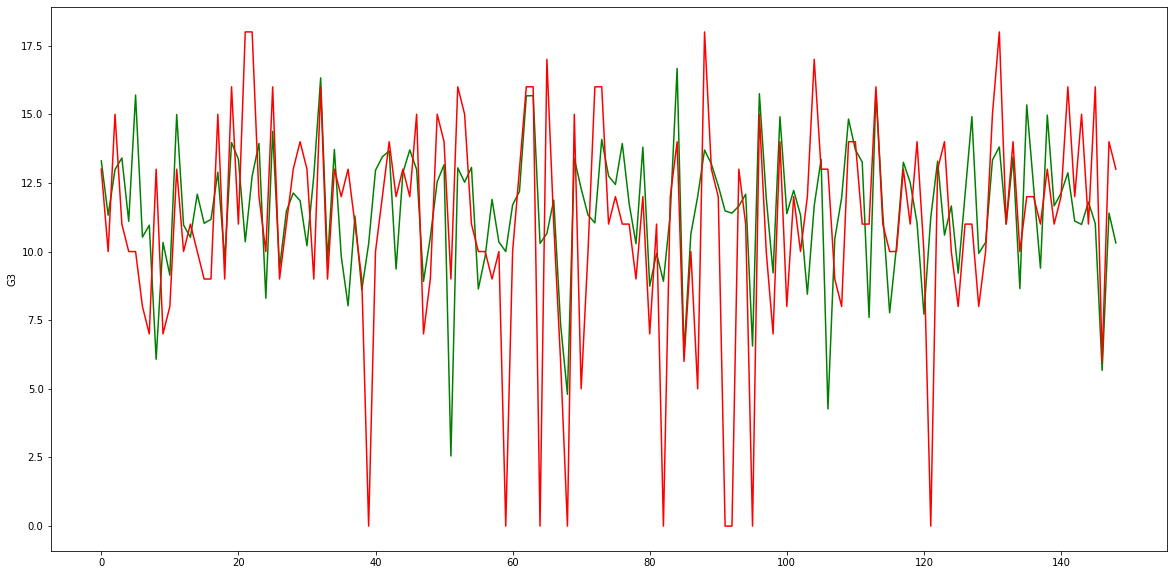

In [211]:
plt.figure(figsize=(20, 10))
plt.plot(G3_pred_knn1[1:150], 'g-', label='True')
plt.plot(G3_test_true[1:150].values, 'r-', label='Pred')
plt.ylabel("G3")
plt.show()

в реальных данных довольно сильный разброс в значениях G3. Модель не определяет крайние значения. Модель недообучилась

Таким образом knn работает недостаточно качественно, особенно на данных без признака G1. Скорее всего эта модель нам не подходит. Посмотрим дальше

# **Linear** **Regression** 

In [212]:
linear = LinearRegression()
linear.fit(df_train, G3_train_true)
G3_pred_linear1 = linear.predict(df_test)

In [213]:
compute_metrics(G3_pred_linear1, G3_test_true)

MSE:   5.34243334288736
RMSE:  2.3113704469183127
MAE:   1.6029700695460332
MedAE: 1.1344082359306213
R2:    0.6765962698741501


Судя по метрикам, линейная регрессия дает вроде бы неплохи результаты, но далекие от идеала, посмотрим, чем нам смогут помочь регуляризации

In [214]:
linear = LinearRegression()
linear.fit(df_train_noG1, G3_train_true)
G3_pred_linear2 = linear.predict(df_test_noG1)

In [215]:
compute_metrics(G3_pred_linear2, G3_test_true)

MSE:   13.612277242746181
RMSE:  3.6894819748504237
MAE:   2.672129516985083
MedAE: 1.9090386152490364
R2:    0.1759820004731968


как видно из метрик, без G1 модель дает просто ужасные результаты. Это логично, ведь признак G1 имеет наибольшую корреляцию с G3 в сравнении с остальными признаками

гребневая регуляризация. Здесь нам необходимо подбирать коэффициент регуляризации на кросс-валидации

In [216]:
ridgeModel = RidgeCV(alphas=np.arange(0, 50, 0.1), cv=5, scoring='neg_root_mean_squared_error')
ridgeModel.fit(df_train, G3_train_true)
print(ridgeModel.alpha_)
G3_pred_ridgecv = ridgeModel.predict(df_test)
compute_metrics(G3_pred_ridgecv, G3_test_true)

49.900000000000006
MSE:   5.368800679789015
RMSE:  2.3170672583654137
MAE:   1.5891117343934669
MedAE: 1.0810533098388753
R2:    0.6750001254657536


In [217]:
ridgeModel = RidgeCV(alphas=np.arange(0, 30, 0.1), cv=5, scoring='neg_root_mean_squared_error')
ridgeModel.fit(df_train_noG1, G3_train_true)
G3_pred_ridgecv2 = ridgeModel.predict(df_test_noG1)
compute_metrics(G3_pred_ridgecv2, G3_test_true)

MSE:   13.69609810703948
RMSE:  3.7008239767705082
MAE:   2.673690953164414
MedAE: 1.9105212605830797
R2:    0.17090791186319743


в данных с G1 улучшение не значительно. В данных без этого признака применение регуляризации дало больше профита

попробуем Лассо регуляризацию

In [218]:
lasso = LassoCV(alphas=np.array(range(1,2000,1)) / 1000,cv=5)
lasso.fit(df_train,G3_train_true )
G3_pred_lasso1 = lasso.predict(df_test)
print(lasso.alpha_)
compute_metrics(G3_pred_lasso1, G3_test_true)

0.046
MSE:   5.286269422020266
RMSE:  2.2991888617554377
MAE:   1.5637439192810823
MedAE: 1.0987890787452752
R2:    0.6799961478587941


снова незначительные улучшения. Посмотрим, что будет в данных без G1

In [219]:
lasso = LassoCV(alphas=np.array(range(1,2000,1)) / 1000,cv=5)
lasso.fit(df_train_noG1,G3_train_true )
G3_pred_lasso1 = lasso.predict(df_test_noG1)
print(lasso.alpha_)
compute_metrics(G3_pred_lasso1, G3_test_true)

0.029
MSE:   13.457645717870031
RMSE:  3.668466398629001
MAE:   2.645354614007236
MedAE: 1.8796174406420931
R2:    0.18534260616172138


такие же незначительные

# **Trees and Forest**

In [220]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [221]:
tree = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=5, min_samples_split=5)
tree.fit(df_train, G3_train_true)
G3_pred_tree1 = tree.predict(df_test)

In [222]:
tree.feature_importances_

array([0.01901272, 0.03017109, 0.01896266, 0.        , 0.        ,
       0.00613582, 0.        , 0.        , 0.        , 0.01933105,
       0.        , 0.        , 0.        , 0.01157495, 0.        ,
       0.        , 0.        , 0.00772128, 0.        , 0.        ,
       0.00969817, 0.09001847, 0.74610179, 0.        , 0.01138944,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.00551262,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.02436994, 0.        , 0.        ])

In [223]:
compute_metrics(G3_pred_tree1,G3_test_true)

MSE:   6.278606965174129
RMSE:  2.5057148611073305
MAE:   1.5621890547263682
MedAE: 1.0
R2:    0.6199250824093497


In [224]:
rfr = RandomForestRegressor(max_depth=2, random_state=10, n_estimators=10)
rfr.fit(df_train, G3_train_true)
G3_pred_rfc1 = rfr.predict(df_test)
compute_metrics(G3_pred_rfc1,G3_test_true)

MSE:   5.901266279454512
RMSE:  2.4292522058144788
MAE:   1.6165392482354048
MedAE: 1.0791409772545997
R2:    0.6427673674614298


Судя по метрикам - рандом форест дает очень неплохие результаты

In [225]:
rfr = RandomForestRegressor(max_depth=2, random_state=10, n_estimators=10)
rfr.fit(df_train_noG1, G3_train_true)
G3_pred_rfc2 = rfr.predict(df_test_noG1)
compute_metrics(G3_pred_rfc2,G3_test_true)

MSE:   11.247314982136032
RMSE:  3.3537016835335893
MAE:   2.4735647280152433
MedAE: 1.7335351734450182
R2:    0.31914478185004813


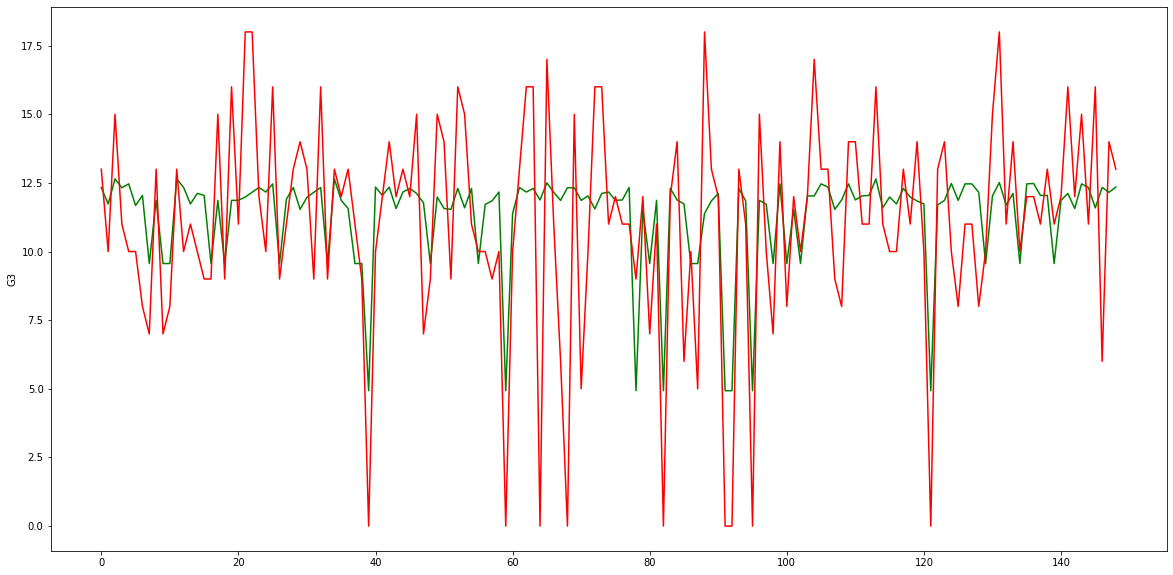

In [226]:
plt.figure(figsize=(20, 10))
plt.plot(G3_pred_rfc2[1:150], 'g-', label='True')
plt.plot(G3_test_true[1:150].values, 'r-', label='Pred')
plt.ylabel("G3")
plt.show()

модель неплохо улавливает нижние пики, несколько раз довольно точные попадания, но верхние пики не улавливает вообще. Это странно, скорее всего модель недообучена. Попробуем поподбирать параметры.

In [227]:
param = {'max_depth': range(2, 10), 'n_estimators': range(2, 20)}
grid = RandomizedSearchCV(RandomForestRegressor(random_state=10), param, n_iter=20, cv=5)
grid.fit(df_train, G3_train_true)
G3_pred_fgrid1 = grid.predict(df_test)
compute_metrics(G3_pred_fgrid1,G3_test_true)

MSE:   4.7936451154988715
RMSE:  2.1894394523482195
MAE:   1.4974424991956654
MedAE: 1.216330087494752
R2:    0.70981711670472


Круто! Это лучшие результаты из полученных за это время. Учитывая то, что большинство прогон с кроссвалидацией не дают особых улучшений, а некоторые модели работают окровенно плохо - данные сложные и такой результат вполне неплох

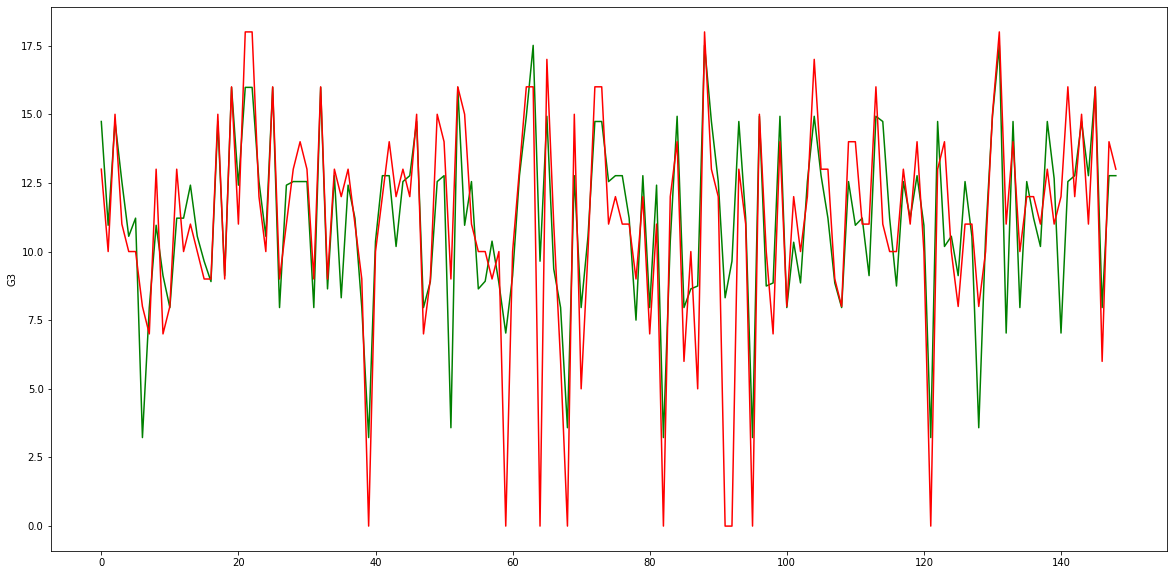

In [228]:
plt.figure(figsize=(20, 10))
plt.plot(G3_pred_fgrid1[1:150], 'g-', label='True')
plt.plot(G3_test_true[1:150].values, 'r-', label='Pred')
plt.ylabel("G3")
plt.show()

во многих местах очень качественное совпадение

In [229]:
grid.fit(df_train_noG1, G3_train_true)
G3_pred_fgrid2 = grid.predict(df_test_noG1)
compute_metrics(G3_pred_fgrid2,G3_test_true)

MSE:   11.257032883956947
RMSE:  3.355150202890617
MAE:   2.4399395180966597
MedAE: 1.7676379385696208
R2:    0.31855650952240844


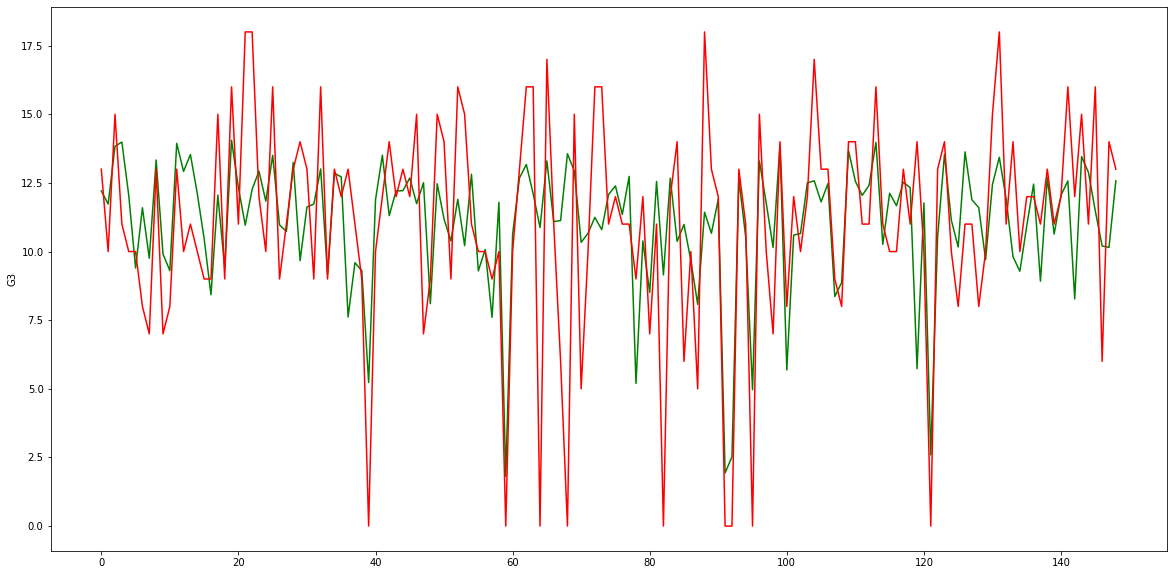

In [230]:
plt.figure(figsize=(20, 10))
plt.plot(G3_pred_fgrid2[1:150], 'g-', label='True')
plt.plot(G3_test_true[1:150].values, 'r-', label='Pred')
plt.ylabel("G3")
plt.show()

Уже гораздо лучше, но почему то все еще вообще не чувствует верхние пики

# **Polynomial Regression**

In [231]:
from sklearn.preprocessing import PolynomialFeatures

In [232]:
poly = PolynomialFeatures(degree=2)
poly.fit(df_train)
poly_train = poly.transform(df_train)
poly_test = poly.transform(df_test)

In [233]:
regModel = LinearRegression()
regModel.fit(poly_train, G3_train_true)
G3_pred_poly1 = regModel.predict(poly_test)

In [234]:
compute_metrics(G3_pred_poly1, G3_test_true)

MSE:   2177.3635793334265
RMSE:  46.66222861515968
MAE:   32.19092119515343
MedAE: 21.37981735042115
R2:    -130.80651179000563


результаты просто ужасны

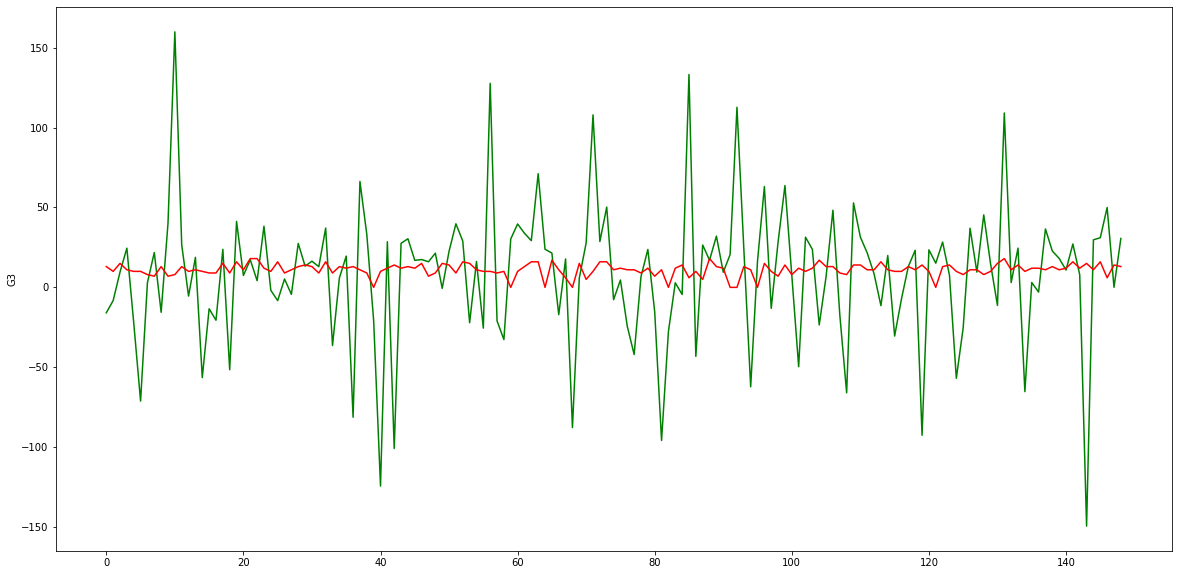

In [235]:
plt.figure(figsize=(20, 10))
plt.plot(G3_pred_poly1[1:150], 'g-', label='True')
plt.plot(G3_test_true[1:150].values, 'r-', label='Pred')
plt.ylabel("G3")
plt.show()

на лицо сильнейшее переобучение

In [236]:
ridgeModel = RidgeCV(alphas=np.arange(0, 30, 0.1), cv=5, scoring='neg_root_mean_squared_error')
ridgeModel.fit(poly_train, G3_train_true)
G3_pred_ridgecv2 = ridgeModel.predict(poly_test)
compute_metrics(G3_pred_ridgecv2, G3_test_true)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:188: LinAlgWarning: Ill-conditioned matrix (rcond=2.56115e-17): result may not be accurate.
  overwrite_a=False)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:188: LinAlgWarning: Ill-conditioned matrix (rcond=1.50972e-17): result may not be accurate.
  overwrite_a=False)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:188: LinAlgWarning: Ill-conditioned matrix (rcond=1.86482e-17): result may not be accurate.
  over

MSE:   7.346538043617062
RMSE:  2.71044978621945
MAE:   2.0684283007019832
MedAE: 1.7610345914879257
R2:    0.5552779689838583


комбинирования полиномеальной регрессии с регуляризацией и кросс валидацией значительно улучшает результат, но не делает его лучшим из доступных

## Часть 3. Бинарная классификация

Решите задачу бинарной классификации: постройте модель, предсказывающую, сдаст студент предмет (`G3` >= 8) или не сдаст (`G3` < 8). <br>При решении задачи **нельзя** использовать признаки `G1` и `G2`.  


In [237]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

In [238]:
def compute_classification_metrics(y_pred, y_test):
  print("Accuracy: ", accuracy_score(y_test, y_pred))
  print("Recall: ", recall_score(y_test, y_pred))
  print("Precision: ", precision_score(y_test, y_pred))
  print("F1: ", f1_score(y_test, y_pred))

In [239]:
bin_train_true = G3_train_true.copy() 
bin_test_true = G3_test_true.copy() 

In [240]:
def changeG3ToBin(data):
  for index in data.index:
    if data[index] >= 8:
      data[index] = 1
    else:
      data[index] = 0

In [241]:
changeG3ToBin(bin_train_true)
changeG3ToBin(bin_test_true)

### Задание 1  
  
* Постройте дерево решений глубины 5 (остальные параметры по умолчанию), оцените качество на 5-fold валидации.  
* Для одного из деревьев (т.е. обученного на одной из итераций кросс-валидации) выведите само дерево - постройте график или выведите в текстовом виде. По структуре дерева сформулируйте правила, по которым принимается решение.  
* Сравните между собой деревья решений, полученных на различных итерациях 5-fold валидации. Сделайте вывод, насколько сильно они похожи или различаются между собой. 

In [242]:
from sklearn import tree as tr

In [243]:
# your code here
tree = DecisionTreeClassifier(max_depth=5)
tree.fit(df_train_noG1, bin_train_true)
G3_pred_bin1 = tree.predict(df_test_noG1)
compute_classification_metrics(G3_pred_bin1, bin_test_true)

Accuracy:  0.8407960199004975
Recall:  0.9248554913294798
Precision:  0.8938547486033519
F1:  0.9090909090909091


даже простые модели и без подбора гиперпараметров уже показывают себя довольно успешно, ибо мы упростили задачу, преобразовав ее в задачу бинарной классификации

In [244]:
tree.tree_

In [245]:
tr.export_graphviz(tree, out_file='tree.dot')

In [246]:
from sklearn.externals.six import StringIO  
import pydot 
dot_data = StringIO() 
tr.export_graphviz(tree, out_file=dot_data) 
graph = pydot.graph_from_dot_data(dot_data.getvalue()) 
#graph.write_pdf("iris.pdf") 
print(graph[0])

digraph Tree {
node [shape=box];
0 [label="X[6] <= 0.5\ngini = 0.159\nsamples = 803\nvalue = [70, 733]"];
1 [label="X[22] <= 0.5\ngini = 0.099\nsamples = 671\nvalue = [35, 636]"];
0 -> 1  [labeldistance="2.5", labelangle=45, headlabel="True"];
2 [label="X[18] <= 3.5\ngini = 0.032\nsamples = 430\nvalue = [7, 423]"];
1 -> 2;
3 [label="X[12] <= 0.5\ngini = 0.024\nsamples = 414\nvalue = [5, 409]"];
2 -> 3;
4 [label="X[15] <= 2.0\ngini = 0.133\nsamples = 28\nvalue = [2, 26]"];
3 -> 4;
5 [label="gini = 0.5\nsamples = 2\nvalue = [1, 1]"];
4 -> 5;
6 [label="gini = 0.074\nsamples = 26\nvalue = [1, 25]"];
4 -> 6;
7 [label="X[25] <= 0.5\ngini = 0.015\nsamples = 386\nvalue = [3, 383]"];
3 -> 7;
8 [label="gini = 0.0\nsamples = 273\nvalue = [0, 273]"];
7 -> 8;
9 [label="gini = 0.052\nsamples = 113\nvalue = [3, 110]"];
7 -> 9;
10 [label="X[39] <= 0.5\ngini = 0.219\nsamples = 16\nvalue = [2, 14]"];
2 -> 10;
11 [label="X[13] <= 0.5\ngini = 0.124\nsamples = 15\nvalue = [1, 14]"];
10 -> 11;
12 [label="gi

### Задание 2  
  
На кросс-валидации (5-fold из 2 повторений) оцените, как меняется качество модели Random Forest с ростом числа деревьев (при дефолтных значениях остальных параметров). Провизуализируйте результаты. Сколько деревьев достаточно в данном случае и почему?  
**NB:** В сравнение включите конфигурацию, аналогичную простому дереву решений. 

In [247]:
from sklearn.model_selection import KFold, RepeatedStratifiedKFold

In [248]:
# RandomForestClassifier(criterion='entropy')
# kfold = KFold(2,True,1)
# df_train_noG12=df_train_noG1.copy()
# df_train_noG12.reindex()
# for train, test in kfold.split(df_train_noG12):
# 	print('train: %s, test: %s' % (df_train_noG12[train], df_train_noG12[test]))

In [249]:
dtc = RandomForestClassifier()
par = {
    'n_estimators': np.arange(1, 20)
}
rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=2)
grid = GridSearchCV(dtc, param_grid=par, cv=rskf, scoring='f1_micro', n_jobs=-1, verbose=4)
grid.fit(df_train_noG1, bin_train_true)

Fitting 10 folds for each of 19 candidates, totalling 190 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 190 out of 190 | elapsed:    5.8s finished


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=2, n_splits=5, random_state=None),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                   

In [250]:
grid.best_params_

{'n_estimators': 16}

In [251]:
df_bin = df.copy()
df_bin['Gbin'] = None
for index, row in df_bin.iterrows():
    if 8 <= row['G3']:
        df_bin.at[index, 'rate'] = 1
    else:
        df_bin.at[index, 'rate'] = 0

In [252]:
df_bin = df_bin.drop(columns=['G1','G2','G3'])

In [253]:
# df_bin.iloc[[35,  736,  737,  739,  740,  741,  745,  746,  747,  748]]

In [254]:
# RandomForestClassifier(criterion='entropy')
# kfold = KFold(2,True,1)
# est = 80
# for train, test in kfold.split(df_bin):
#   #print(train, test)
# 	#print('train: %s, test: %s' % (df_bin.iloc[train], df_bin.iloc[test]))
#   true_train = train.Gbin
#   true_test = test.Gbin
#   rf = RandomForestClassifier(n_estimators=est)
#   rf.fit(train.drop(columns=['Gbin']))

#   est+=5

### Задание 3  
  
* Настройте гиперпараметры модели Random Forest на 5-fold валдиации. В качестве метрики используйте F1-score. Замерьте время, затраченное на вычисления.
* Обучите Random Forest  с настроенными параметрами на всех данных для моделирования. На отложенной выборке оцените качество (F1-score) всего ансамбля и <u>каждого дерева отдельно</u>. Постройте график распределения качества деревьев в ансамбле и сравните результаты с качеством всего леса. Дайте комментарий.  
* Выведите важность признаков в Random Forest, сделайте выводы. 

In [255]:
#from sklearn.ensemble import RandomForestClassifier

In [256]:
# your code here
%%time
param = {'n_estimators': range(5, 51, 1), 'max_depth': range(2, 7), 'min_samples_split': range(2, 11, 1)}
grid = RandomizedSearchCV(RandomForestClassifier(criterion='entropy'), param, scoring='f1', n_iter=30, cv=5)
grid.fit(df_train, bin_train_true)
G3_pred_fgrid3 = grid.predict(df_test)
compute_classification_metrics(G3_pred_fgrid3,bin_test_true)
print(grid.best_params_)

Accuracy:  0.8706467661691543
Recall:  0.9942196531791907
Precision:  0.8730964467005076
F1:  0.9297297297297297
{'n_estimators': 49, 'min_samples_split': 8, 'max_depth': 6}
CPU times: user 8 s, sys: 56.9 ms, total: 8.06 s
Wall time: 8.09 s


очень хорошие результаты. По опыту ансамблевые методы показывают себя довольно круто с нашими данными

это связано еще и с тем, что бинарная классификация - более простая задача, нежели регрессия, которая должна предсказывать число в range(0,21)

In [257]:
rf = RandomForestClassifier(criterion='entropy',n_estimators= 24, min_samples_split= 5,max_depth= 6)
rf.fit(df_train, bin_train_true)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=24,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [258]:
rf.feature_importances_

array([0.0598462 , 0.03888864, 0.01492151, 0.02940602, 0.01684553,
       0.01109201, 0.06544163, 0.00566047, 0.01495223, 0.003781  ,
       0.00678713, 0.0052162 , 0.01754341, 0.01878434, 0.00730348,
       0.01539928, 0.01151928, 0.02414593, 0.01930358, 0.02624445,
       0.00937917, 0.06153021, 0.31379433, 0.04785527, 0.02564558,
       0.01070501, 0.002531  , 0.00902236, 0.00789597, 0.00643334,
       0.00229852, 0.00249448, 0.00418841, 0.01142289, 0.00572683,
       0.00432274, 0.        , 0.        , 0.00805183, 0.00617142,
       0.00466985, 0.00468836, 0.00702799, 0.00568686, 0.00775814,
       0.00510125, 0.00632834, 0.0061875 ])

In [259]:
df_train.columns[23]

'x0_Math'

наибольший вес имеет признак x0_Math говорящий нам о том, что данная запись относиться к матиматике.

это странно и неправильно, ведь статистически оценки по математике значительно хуже, этот признок имеет отрицательный коэффициент корреляции с G3

In [260]:
lst_metrics_tree = [ f1_score(tree.predict(df_test),bin_test_true) for tree in rf.estimators_]
lst_metrics_tree

[0.9130434782608696,
 0.9120879120879121,
 0.9315068493150684,
 0.9075144508670521,
 0.9344262295081968,
 0.9285714285714286,
 0.9130434782608696,
 0.9121813031161473,
 0.9329608938547486,
 0.9126760563380282,
 0.9085872576177285,
 0.9283667621776504,
 0.8988764044943819,
 0.9126760563380282,
 0.9126760563380282,
 0.9075144508670521,
 0.9411764705882352,
 0.9120879120879121,
 0.9060773480662984,
 0.907103825136612,
 0.9217877094972067,
 0.9221902017291066,
 0.9005524861878452,
 0.9096045197740112]

по отдельности деревья обучились довольно качественно что не может не радовать


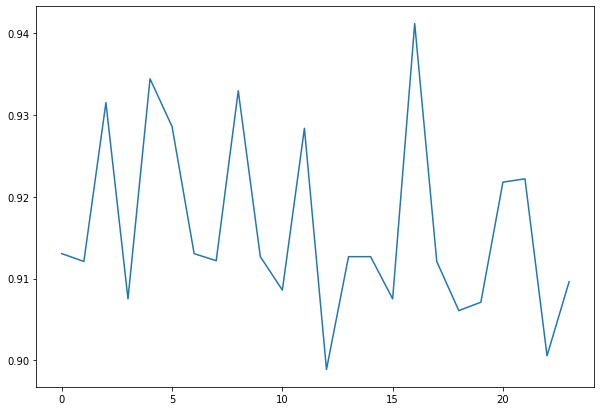

In [261]:
plt.plot(lst_metrics_tree)

### Задание 4  
  
* Примените логистическую регрессию для решения задачи, подберите оптимальные значения гиперпараметров. Оцените качество (roc auc) на 5-fold валидации из 2 повторений. 
* Аналогично (на такой же валидации (тех же подвыборках) с такой же метрикой) оцените качество Random Forest  с подобранными в предыдущем задании параметрами. Сравните с качеством логистическом регрессии.
* Обучите логистическую модель с настроенными параметрами на всех данных для моделирования. На отложенной выборке оцените качество - постройте ROC-кривую, вычислите roc auc. Вычислите аналогичную метрику для Random Forest из Задания 3, сравните точность моделей. 

In [262]:
# your code here

### Задание 5  
  
* Используйте для решения задачи один из фреймворков градиентного бустинга: XGBoost, LightGDB или CatBoost.  
* Оцените на 5-fold валидации, как растет качество модели на обучающей и на тестовой выборках при добавлении каждого дерева. Провизуализируйте результаты.  
* Настройте гиперпараметры модели на 5-fold валидации, в качестве метрики используйте F1-score. Замерьте время, затраченное на вычисления.  
* Обучите модель с настроенными параметрами на всех данных для моделирования и оцените качество на отложенной выборке. Сравните результаты с другими моделями, дайте комментарий.

In [263]:
!pip install catboost

In [264]:
# your code here
import catboost

In [265]:
cat = catboost.CatBoostClassifier(iterations=500, depth=8, task_type='CPU')

In [266]:
cat.fit(df_train_noG12, bin_train_true, eval_set=(df_test_noG1, bin_test_true), logging_level='Verbose')

Learning rate set to 0.040581
0:	learn: 0.6516035	test: 0.6594401	best: 0.6594401 (0)	total: 8.81ms	remaining: 4.4s
1:	learn: 0.6159773	test: 0.6304155	best: 0.6304155 (1)	total: 18.2ms	remaining: 4.53s
2:	learn: 0.5831407	test: 0.6029804	best: 0.6029804 (2)	total: 22.4ms	remaining: 3.71s
3:	learn: 0.5544062	test: 0.5809673	best: 0.5809673 (3)	total: 27.8ms	remaining: 3.45s
4:	learn: 0.5282330	test: 0.5592113	best: 0.5592113 (4)	total: 33.2ms	remaining: 3.28s
5:	learn: 0.5048916	test: 0.5402014	best: 0.5402014 (5)	total: 34.5ms	remaining: 2.84s
6:	learn: 0.4819375	test: 0.5225200	best: 0.5225200 (6)	total: 39.8ms	remaining: 2.8s
7:	learn: 0.4617069	test: 0.5102787	best: 0.5102787 (7)	total: 45ms	remaining: 2.77s
8:	learn: 0.4430813	test: 0.4966420	best: 0.4966420 (8)	total: 50.2ms	remaining: 2.74s
9:	learn: 0.4251186	test: 0.4841678	best: 0.4841678 (9)	total: 55.5ms	remaining: 2.72s
10:	learn: 0.4078285	test: 0.4720082	best: 0.4720082 (10)	total: 60.9ms	remaining: 2.71s
11:	learn: 0.39

In [267]:
G3_pred_cat1 = cat.predict(df_test_noG1)
compute_classification_metrics(G3_pred_cat1, bin_test_true)

Accuracy:  0.8606965174129353
Recall:  1.0
Precision:  0.8606965174129353
F1:  0.9251336898395722


In [268]:
%%time
par = {
    'depth': range(2,6),
}
grid = GridSearchCV(catboost.CatBoostClassifier(), param_grid=par, cv=5, scoring='f1_micro', n_jobs=-1, verbose=4)
grid.fit(df_train_noG1, bin_train_true)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   27.9s finished


Learning rate set to 0.009381
0:	learn: 0.6823026	total: 1.1ms	remaining: 1.1s
1:	learn: 0.6733285	total: 2.17ms	remaining: 1.08s
2:	learn: 0.6643703	total: 3.19ms	remaining: 1.06s
3:	learn: 0.6545087	total: 4.21ms	remaining: 1.05s
4:	learn: 0.6451146	total: 5.17ms	remaining: 1.03s
5:	learn: 0.6368800	total: 6.15ms	remaining: 1.02s
6:	learn: 0.6275914	total: 7.12ms	remaining: 1.01s
7:	learn: 0.6186830	total: 8.07ms	remaining: 1s
8:	learn: 0.6108761	total: 9.02ms	remaining: 994ms
9:	learn: 0.6030822	total: 9.94ms	remaining: 984ms
10:	learn: 0.5939870	total: 10.9ms	remaining: 976ms
11:	learn: 0.5864729	total: 11.8ms	remaining: 971ms
12:	learn: 0.5795391	total: 13ms	remaining: 984ms
13:	learn: 0.5722456	total: 14ms	remaining: 988ms
14:	learn: 0.5649676	total: 15ms	remaining: 985ms
15:	learn: 0.5584744	total: 15.9ms	remaining: 981ms
16:	learn: 0.5520921	total: 16.9ms	remaining: 977ms
17:	learn: 0.5453147	total: 17.8ms	remaining: 973ms
18:	learn: 0.5393077	total: 18.8ms	remaining: 970ms
19:

In [269]:
G3_pred_cat3 = grid.predict(df_test_noG1)
compute_classification_metrics(G3_pred_cat3, bin_test_true)

Accuracy:  0.8756218905472637
Recall:  0.9884393063583815
Precision:  0.8814432989690721
F1:  0.9318801089918257


##  Часть 4. Многоклассовая классификация
  
* Решите задачу многоклассовой классификации: постройте модель, пресдказывающую оценку студента по предмету по 4 балльной шкале
    - Отлично: 18 <= `G3` <= 20
    - Хорошо: 14 <= `G3` <= 17
    - Удовлетворительно: 8 <= `G3` <= 13
    - Неудовлетворительно: `G3` < 8  
  
  При решении задачи **нельзя** использовать признаки `G1` и `G2`.  
  
  
* Для решения задачи примените следующие методы:  
  * KNN  
  * Логистическая регрессия  
  * Деревья решений  
  * Random Forest
  * Gradient Boosting
  
  На кросс-валидации подберите оптимальные значения гиперпараметров алгоритмов.  
  
  
* Оцените качество моделей, используйте confusion matrix и производные от нее метрики. Сделайте выводы.    

создадим отдельный датасет для мультиклассовой классификации

In [270]:
# your code here
df_multi = df.copy()
df_multi['rate'] = None
for index, row in df_multi.iterrows():
    if 18 <= row['G3'] <= 20:
        df_multi.at[index, 'rate'] = 3
    elif 14 <= row['G3'] <= 17:
        df_multi.at[index, 'rate'] = 2
    elif 8 <= row['G3'] <= 13:
        df_multi.at[index, 'rate'] = 1
    else:
        df_multi.at[index, 'rate'] = 0

In [271]:
df_multi = df_multi.drop(columns=['G1','G2','G3'])

In [272]:
X_train, X_test, y_train, y_test = train_test_split(df_multi.drop(['rate'], axis=1), 
                                                    df_multi['rate'], 
                                                    random_state = 10)

In [273]:
y_train=y_train.astype('int')
y_test=y_test.astype('int')

# KNN-multi

In [274]:
from sklearn import metrics

In [275]:
grid = GridSearchCV(KNeighborsClassifier(), param_grid={'n_neighbors': range(1, 100)}, scoring='accuracy')
grid.fit(X_train, y_train)
grid.best_estimator_.n_neighbors

26

In [276]:
knn = KNeighborsClassifier(n_neighbors=26)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [277]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1])

In [278]:
y_pred = knn.predict(X_test)
# compute_classification_metrics(y_pred,y_test)
# print(metrics.classification_report(y_test, y_pred))
f1_score(list(y_test), y_pred, average='micro')

0.6334661354581673

In [279]:
pd.DataFrame(metrics.confusion_matrix(list(y_test), y_pred))

,0,1,2,3
0,0,25,0,0
1,0,159,0,0
2,0,59,0,0
3,0,8,0,0


модель выдает только единицы без вариаций. Несмотря на кросс-валидацию и подбор параметров это сильно недообученная модель

# Logistic Regression-multi

In [280]:
from sklearn.linear_model import LogisticRegression

1.6666666666666667
1.7
1.7333333333333334
1.7666666666666666
1.8
1.8333333333333333
1.8666666666666667
1.9
1.9333333333333333
1.9666666666666666
2.0
2.033333333333333
2.066666666666667
2.1
2.1333333333333333
2.1666666666666665
2.2
2.2333333333333334
2.2666666666666666
2.3
2.3333333333333335
2.3666666666666667
2.4
2.433333333333333
2.466666666666667
2.5
2.533333333333333
2.566666666666667
2.6
2.6333333333333333
2.6666666666666665
2.7
2.7333333333333334
2.7666666666666666
2.8
2.8333333333333335
2.8666666666666667
2.9
2.933333333333333
2.966666666666667
3.0
3.033333333333333
3.066666666666667
3.1
3.1333333333333333
3.1666666666666665
3.2
3.2333333333333334
3.2666666666666666
3.3
3.3333333333333335
3.3666666666666667
3.4
3.433333333333333
3.466666666666667
3.5
3.533333333333333
3.566666666666667
3.6
3.6333333333333333
3.6666666666666665
3.7
3.7333333333333334
3.7666666666666666
3.8
3.8333333333333335
3.8666666666666667
3.9
3.933333333333333
3.966666666666667
4.0
4.033333333333333
4.0666666

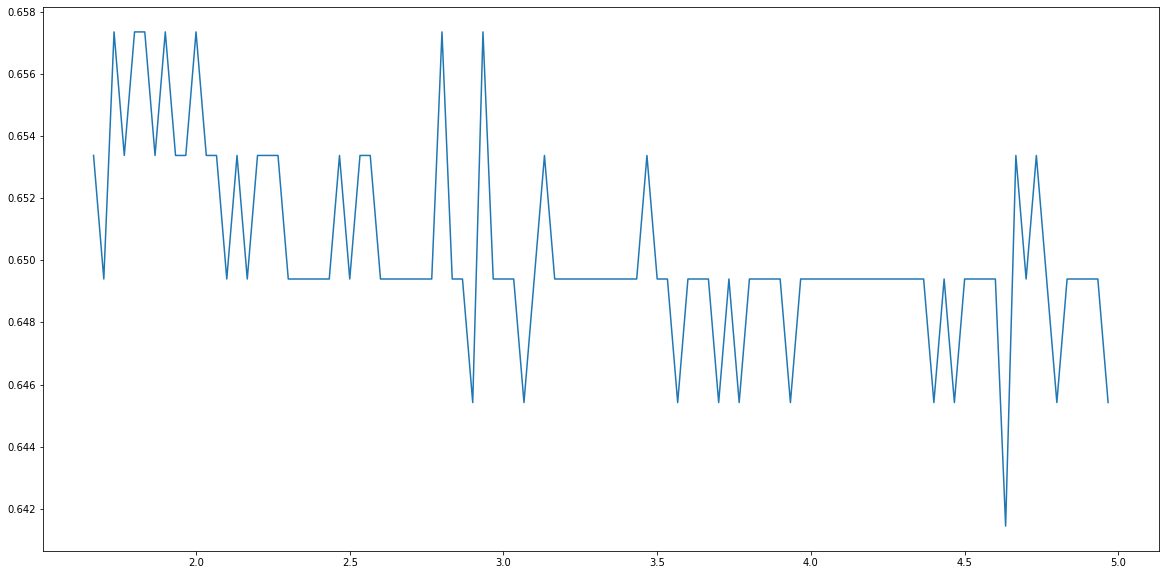

In [281]:
c = np.array(range(50, 150)) / 30
scores = []
for i in c:
    lr = LogisticRegression(max_iter=10000, C = i)
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    scores.append(accuracy_score(list(y_test), y_pred))
    print(i)

plt.figure(figsize=(20, 10))
plt.plot(c, scores)

In [282]:
lr = LogisticRegression(max_iter=10000, C = 1)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [283]:
accuracy_score(list(y_test), y_pred)

0.6533864541832669

In [284]:
pd.DataFrame(metrics.confusion_matrix(list(y_test), y_pred))

,0,1,2,3
0,5,17,3,0
1,10,136,13,0
2,2,33,23,1
3,0,4,4,0


164 элемента на диагонали. Больше, чем в предсказании knn, но не намного

# Decision Trees-multi

займемся подбором параметров

In [285]:
param_grid = {'max_depth': range(1, 10),'min_samples_split': range(2, 20),'min_samples_leaf': range(1, 20)}
grid = GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid, cv=5, scoring='f1_micro', n_jobs=-1, verbose=3)
grid.fit(X_train, y_train)
grid.best_params_

Fitting 5 folds for each of 3078 candidates, totalling 15390 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 252 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 1788 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 4348 tasks      | elapsed:   20.7s
[Parallel(n_jobs=-1)]: Done 7932 tasks      | elapsed:   40.3s
[Parallel(n_jobs=-1)]: Done 12540 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 15390 out of 15390 | elapsed:  1.4min finished


{'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [286]:
dtc = DecisionTreeClassifier(max_depth=1, min_samples_leaf=1, min_samples_split=2)
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
print(metrics.classification_report(list(y_test), y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        25
           1       0.63      1.00      0.78       159
           2       0.00      0.00      0.00        59
           3       0.00      0.00      0.00         8

    accuracy                           0.63       251
   macro avg       0.16      0.25      0.19       251
weighted avg       0.40      0.63      0.49       251



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [287]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1])

Ясно..... как и в случае с KNN, модель не выдает ничего, кроме единиц, такая модель нам точно не подходит - переходим к кследующим вариантам

# Random Forest-multi

In [288]:
rfc = RandomForestClassifier(n_estimators=30, criterion='entropy', max_depth=5, min_samples_split=5)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
y_pred_proba = rfc.predict_proba(X_test)

In [289]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1])

выглядит не очень. Попробуем с кроссвалидацией

In [290]:
param = {'n_estimators': range(20,50), 'max_depth': range(2, 20),'min_samples_split': range(2, 20) }
grid = RandomizedSearchCV(RandomForestClassifier(criterion='entropy'), param, n_iter=50, cv=5, verbose=3)
grid.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] n_estimators=45, min_samples_split=3, max_depth=4 ...............
[CV]  n_estimators=45, min_samples_split=3, max_depth=4, score=0.629, total=   0.1s
[CV] n_estimators=45, min_samples_split=3, max_depth=4 ...............
[CV]  n_estimators=45, min_samples_split=3, max_depth=4, score=0.616, total=   0.1s
[CV] n_estimators=45, min_samples_split=3, max_depth=4 ...............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV]  n_estimators=45, min_samples_split=3, max_depth=4, score=0.623, total=   0.1s
[CV] n_estimators=45, min_samples_split=3, max_depth=4 ...............
[CV]  n_estimators=45, min_samples_split=3, max_depth=4, score=0.620, total=   0.1s
[CV] n_estimators=45, min_samples_split=3, max_depth=4 ...............
[CV]  n_estimators=45, min_samples_split=3, max_depth=4, score=0.620, total=   0.1s
[CV] n_estimators=24, min_samples_split=17, max_depth=10 .............
[CV]  n_estimators=24, min_samples_split=17, max_depth=10, score=0.669, total=   0.1s
[CV] n_estimators=24, min_samples_split=17, max_depth=10 .............
[CV]  n_estimators=24, min_samples_split=17, max_depth=10, score=0.662, total=   0.1s
[CV] n_estimators=24, min_samples_split=17, max_depth=10 .............
[CV]  n_estimators=24, min_samples_split=17, max_depth=10, score=0.649, total=   0.1s
[CV] n_estimators=24, min_samples_split=17, max_depth=10 .............
[CV]  n_estimators=24, min_samples_split=17, max_depth=10, score

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:   18.2s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='entropy',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
            

In [291]:
grid.best_score_

0.6586666666666667

In [292]:
grid.best_params_

{'max_depth': 18, 'min_samples_split': 3, 'n_estimators': 21}

In [293]:
y_pred = grid.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 3, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1,
       1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 2, 2, 0, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1])

In [294]:
pd.DataFrame(metrics.confusion_matrix(list(y_test), y_pred))

,0,1,2,3
0,4,19,2,0
1,2,141,15,1
2,0,41,18,0
3,0,5,3,0


In [295]:
print(metrics.classification_report(list(y_test), y_pred))

              precision    recall  f1-score   support

           0       0.67      0.16      0.26        25
           1       0.68      0.89      0.77       159
           2       0.47      0.31      0.37        59
           3       0.00      0.00      0.00         8

    accuracy                           0.65       251
   macro avg       0.46      0.34      0.35       251
weighted avg       0.61      0.65      0.60       251



In [296]:
cat = catboost.CatBoostClassifier(iterations=500, depth=8, task_type='CPU')

In [297]:
cat.fit(X_train, y_train, eval_set=(X_test, y_test), logging_level='Verbose')

Learning rate set to 0.139913
0:	learn: 1.2890252	test: 1.2985699	best: 1.2985699 (0)	total: 35.6ms	remaining: 17.8s
1:	learn: 1.2235878	test: 1.2424108	best: 1.2424108 (1)	total: 61.5ms	remaining: 15.3s
2:	learn: 1.1613556	test: 1.1885321	best: 1.1885321 (2)	total: 87.4ms	remaining: 14.5s
3:	learn: 1.1224541	test: 1.1613918	best: 1.1613918 (3)	total: 107ms	remaining: 13.3s
4:	learn: 1.0871832	test: 1.1405383	best: 1.1405383 (4)	total: 126ms	remaining: 12.5s
5:	learn: 1.0500319	test: 1.1129277	best: 1.1129277 (5)	total: 149ms	remaining: 12.3s
6:	learn: 1.0160205	test: 1.0933444	best: 1.0933444 (6)	total: 169ms	remaining: 11.9s
7:	learn: 0.9873277	test: 1.0755508	best: 1.0755508 (7)	total: 188ms	remaining: 11.6s
8:	learn: 0.9620261	test: 1.0575390	best: 1.0575390 (8)	total: 214ms	remaining: 11.7s
9:	learn: 0.9348100	test: 1.0460944	best: 1.0460944 (9)	total: 235ms	remaining: 11.5s
10:	learn: 0.9063473	test: 1.0252453	best: 1.0252453 (10)	total: 254ms	remaining: 11.3s
11:	learn: 0.882327

In [298]:
y_pred = cat.predict(X_test)
y_pred_proba = cat.predict_proba(X_test)
method = 'macro'
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred, average = method))
print("Precision: ", precision_score(y_test, y_pred, average = method))
print("F1: ", f1_score(y_test, y_pred, average = method))
print("ROC AUC: ", roc_auc_score(y_test, y_pred_proba, multi_class='ovr', average = 'macro'))

Accuracy:  0.6772908366533864
Recall:  0.3862153555058096
Precision:  0.7454347826086957
F1:  0.41933699551603687
ROC AUC:  0.7682530630846496


очень неплохие результаты. Одна из немногих моделей, которая хорошо работает и справляется с задачей